In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2020-tokyo-paralympics/paralympic-medals.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-teams.csv
/kaggle/input/2020-tokyo-paralympics/entries-by-discipline.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-coaches.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-medal-tally.csv
/kaggle/input/2020-tokyo-paralympics/NPCs-list.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-athletes.csv


**Introduction:**
The 2020 summer Paralympics, branded as Tokyo 2020 paralympic Games, were a major international multi-sport parasports event governed by the International Paralympic Committee and was held in Tokyo, Japan between 24 august and 5 september 2021.

**Now we are going to do the following tasks**:
* Analysis of Athletes informations in 2021
* Analysis of Teams information in Tokyo 2021
* Analysis of athletes by Gender informations in Tokyo 2021
* Analysis of medals by Country informations in Tokyo 2021

This process of investigating the dataset to discover patterns, outliers, and form hypotheses based on our understanding of the dataset is called **Exploratory Data Analysis(EDA)**, it includes clustering and dimension reduction techniques, which help to create graphical displays of high-dimensional data containing variables and univariate visualization of each field in the raw dataset, with summary statistics.


**Importing Datasets**

In [2]:
Athletes = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-athletes.csv', encoding = 'unicode_escape')
Teams = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-teams.csv', encoding = 'unicode_escape')
Medals = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-medal-tally.csv', encoding = 'unicode_escape')
Gender = pd.read_csv('../input/2020-tokyo-paralympics/entries-by-discipline.csv', encoding = 'unicode_escape')
Medals2 = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-medals.csv', encoding = 'unicode_escape')

**Analysis of athletes in Tokyo paralympics 2021**

In [ ]:
Athletes.shape

* The shape attribute of pandas, it stores the number of rows and columns as a tuple.
(number of rows, number of columns) present in Athletes dataset.

In [ ]:
Athletes.head()

* Pandas head() method will return top n (5 by default) rows of a dataframe or series.

In [ ]:
def Age(x):
    return(2021-int(x.split('-')[0]))

In [ ]:
Athletes['Age'] = Athletes['Date of Birth'].apply(Age)
Athletes=Athletes.drop(['Date of Birth'], axis = 1)
Athletes.head()

* From the above code we will get an output containing a column which shows the age of athlete instead of date of birth, Name,         Country, Country-code, sport, Sport-code and Gender of Athlete.
* Pandas drop function is used to delete the column showing date of birth of Athlete.

In [ ]:
Athletes.groupby('Country')['Name'].count().sort_values(ascending=False).head(15)

* The above code gives an output showing the top 15 countries from which the most athletes competed in the paralympics.
* groupby operation is used to group large amounts of data and compute operations and split data into groups based on some criteria.

In [ ]:
Athletes.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'barh', colormap = 'Blues_r', figsize = (8, 6), title = '')

* The above code gives an output containing barplots showing the top 15 countries from which the most athletes competed in the         paralympics.


In [ ]:
Athletes.groupby('Gender')['Name'].count().sort_values(ascending = False)

* The above code will let us know which gender has most participated in paralympics.

In [ ]:
Athletes.groupby('Gender')['Name'].count().sort_values(ascending = False).plot(legend = True, kind = 'pie', figsize = (8, 6), title = '')

* The above code gives an output showing which gender has most participated in paralympics by representing the data using pie chart.

In [ ]:
Athletes.groupby('Age')['Name'].count().sort_values(ascending = False).head(15)

* The above code gives an output showing the athletes of what ages have participated more in paralympics.

In [ ]:
Athletes.groupby('Age')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'barh', colormap = 'BuPu_r', figsize = (8, 6), title = '')

* The above code gives an output showing barplots representing the athletes of what ages have participated more in paralympics.

**Observations:**
* More number of athletes from Japan have participated in paralympics when compared to other countries.
* According to gender classification more number of males have participated in paralympics when compared to number of females.
* More number of athletes with the age of 31 have participated more when compared to athletes other age groups.

**Analysis of Teams informations in Tokyo 2021**

In [ ]:
Teams.shape

* The above code gives an output showing number of rows, number of columns present in Teams dataset.

In [ ]:
Teams.head()

* The above code gives an output showing the information present in top 5 rows of Teams dataset. 

In [ ]:
Teams = Teams.drop(['Country', 'CountryCode', 'Sport-code'], axis = 1)
Teams.head()

* The above code gives an output showing the information present in top 5 rows of Teams dataset, but it does not show the information   present in columns of Country, Country code and Sport-code because we deleted them using drop function.  

In [ ]:
Teams['Sport'].unique()

* The unique function is used to get unique values of a series object, so the output will be the unique objects or sports that are     present under **Sport** of Teams dataset.

In [ ]:
print(Teams['Event'].unique())

* The output of above code will be the unique Events that are happened in 2021 paralympics. 

In [ ]:
Teams.groupby('Sport')['Team'].count().sort_values(ascending = False)

* The above code gives an output showing number of teams participated in each sport.

In [ ]:
Teams.groupby('Sport')['Team'].count().sort_values(ascending = False).plot(legend = False, kind = 'barh', colormap = 'Accent_r', figsize = (8, 6), title = 'number of teams per play')

* The above code gives output of barplot showing number of teams participated in each sport.

In [3]:
Men_Teams = Teams[Teams['Event']=='Men']
Men_Teams.head()

,Team,Country,CountryCode,Sport,Sport-code,Event
81,Argentina,Argentina,ARG,Football 5-a-side,FB5,Men
82,Brazil,Brazil,BRA,Football 5-a-side,FB5,Men
83,China,People's Republic of China,CHN,Football 5-a-side,FB5,Men
84,France,France,FRA,Football 5-a-side,FB5,Men
85,Japan,Japan,JPN,Football 5-a-side,FB5,Men


* The above code gives an output showing the men teams participated in Paralympics.

In [4]:
Men_Teams.groupby('Sport')['Team'].count().sort_values(ascending = False)

Sport
Wheelchair Basketball    12
Goalball                 10
Football 5-a-side         8
Sitting Volleyball        8
Name: Team, dtype: int64

* The above code gives an output showing the number of men teams participated in each sport. 

<AxesSubplot:ylabel='Team'>

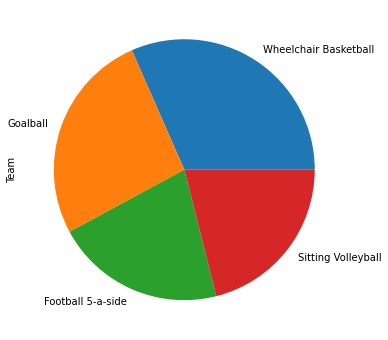

In [6]:
Men_Teams.groupby('Sport')['Team'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', figsize = (8, 6), title = '')

The above code gives an output of piechart showing the number of men teams participated in each sport. 

In [ ]:
Women_Teams = Teams[Teams['Event']=='Women']
Women_Teams.head()

* The above code gives an output showing the women teams participated in Paralympics.

In [ ]:
Women_Teams.groupby('Sport')['Team'].count().sort_values(ascending=False)

* The above code gives an output showing the number of women teams participated in each sport. 

In [ ]:
Women_Teams.groupby('Sport')['Team'].count().sort_values(ascending = False).plot(legend=False, kind = 'pie', figsize=(8, 6), title='')

The above code gives an output of piechart showing the number of women teams participated in each sport. 

In [7]:
Mixed_Teams = Teams[Teams['Event']=='Mixed']
Mixed_Teams.head()

,Team,Country,CountryCode,Sport,Sport-code,Event
204,Australia,Australia,AUS,Wheelchair Rugby,WRU,Mixed
205,Canada,Canada,CAN,Wheelchair Rugby,WRU,Mixed
206,Denmark,Denmark,DEN,Wheelchair Rugby,WRU,Mixed
207,France,France,FRA,Wheelchair Rugby,WRU,Mixed
208,Great Britain,Great Britain,GBR,Wheelchair Rugby,WRU,Mixed


The above code gives an output showing the number of mixed teams participated in each sport. 

In [ ]:
Teams[(Teams['Sport']=='Wheelchair Basketball') & (Teams['Event']=='Men')]

* The above code gives an output showing the men teams participated in Wheelchair Basketball game.

In [ ]:
Teams[(Teams['Sport']=='Wheelchair Basketball') & (Teams['Event']=='Women')]

* The above code gives an output showing the women teams participated in Wheelchair Basketball game.

**Observations:**
* We observed the unique sports and events that had taken place in Paralympics.
* We also observed the performance analysis of males and females in 2021 Paralympics.

**Analysis of Athletes by Gender in Tokyo 2021**

In [12]:
Gender.head()

,Discipline,F,M,Total
0,Archery,60,79,139
1,Athletics,489,653,1142
2,Badminton,44,46,90
3,Boccia,41,73,114
4,Canoe Sprint,40,51,91


* The above code gives an output showing the information present in top 5 rows of Gender dataset. 

In [14]:
Gender['F%'] = (Gender['F'] / Gender['Total']) * 100
Gender['M%'] = (Gender['M'] / Gender['Total']) * 100

In [15]:
female = Gender.sort_values(['F'], ascending = False).drop(['M', 'Total', 'F%', 'M%'], axis = 1).head(10)
female

,Discipline,F
1,Athletics,489
15,Swimming,263
19,Wheelchair Basketball,118
16,Table Tennis,105
14,Sitting Volleyball,92
11,Powerlifting,88
5,Cycling Road,74
0,Archery,60
9,Goalball,58
10,Judo,56


* The above code gives an output showing the top 10 sports in which most of the females were participated.

<AxesSubplot:xlabel='F', ylabel='Discipline'>

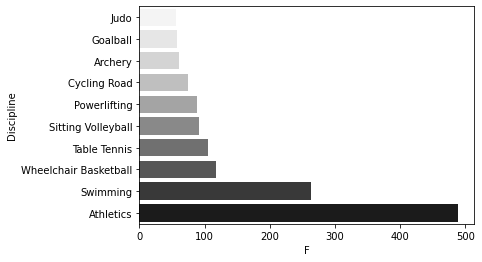

In [16]:
sns.barplot(y = 'Discipline', x = 'F', data = female.sort_values(['F']), palette = 'Greys')

* The above code gives an output of barplot showing the top 10 sports in which most of the females were participated.

In [ ]:
male2 = Gender.sort_values(['M'], ascending = False).drop(['F', 'Total', 'F%', 'M%'], axis = 1).tail(10)
male2

* The above code gives an output showing the top 10 sports in which most of the males were participated.

In [20]:
female_per = Gender.sort_values(['F%'], ascending = False).drop(['F', 'Total', 'M', 'M%'], axis = 1).head(10)
female_per

,Discipline,F%
7,Equestrian,71.428571
12,Rowing,51.851852
20,Wheelchair Fencing,50.000000
18,Triathlon,50.000000
11,Powerlifting,49.438202
17,Taekwondo,49.295775
14,Sitting Volleyball,49.197861
9,Goalball,49.152542
2,Badminton,48.888889
19,Wheelchair Basketball,45.038168


* The above code gives an output showing the percentage of female participated in top 10 sports in paralympics.

<AxesSubplot:xlabel='F%', ylabel='Discipline'>

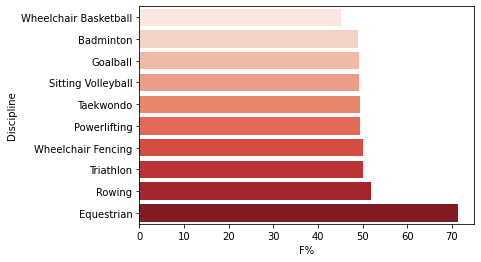

In [21]:
sns.barplot(y = 'Discipline', x = 'F%', data = female_per.sort_values(['F%']), palette = 'Reds')

* The above code gives an output of barplot showing the percentage of female participated in top 10 sports in paralympics.

In [22]:
male_per = Gender.sort_values(['M%'], ascending = False).drop(['F', 'Total', 'M', 'F%'], axis = 1).head(10)
male_per

,Discipline,M%
8,Football 5-a-side,100.000000
21,Wheelchair Rugby,95.652174
22,Wheelchair Tennis,69.230769
5,Cycling Road,65.258216
13,Shooting,64.935065
3,Boccia,64.035088
6,Cycling Track,62.608696
16,Table Tennis,62.230216
10,Judo,58.823529
1,Athletics,57.180385


* The above code gives an output showing the percentage of male participated in top 10 sports in paralympics.

<AxesSubplot:xlabel='M%', ylabel='Discipline'>

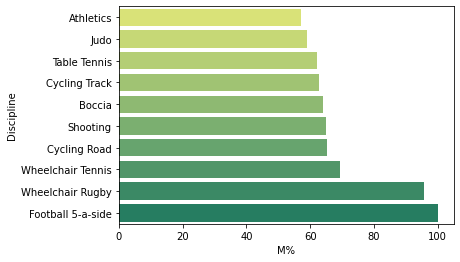

In [23]:
sns.barplot(y = 'Discipline', x = 'M%', data = male_per.sort_values(['M%']), palette = 'summer_r')

* The above code gives an output of barplot showing the percentage of male participated in top 10 sports in paralympics.

In [24]:
both_genders = Gender.sort_values(['Total'], ascending = False).drop(['F', 'M%', 'M', 'F%'], axis = 1).head(10)
both_genders

,Discipline,Total
1,Athletics,1142
15,Swimming,604
16,Table Tennis,278
19,Wheelchair Basketball,262
5,Cycling Road,213
14,Sitting Volleyball,187
11,Powerlifting,178
13,Shooting,154
0,Archery,139
10,Judo,136


* The above code gives an output showing the percentage of teams of both genders participated in top 10 sports in paralympics.

<AxesSubplot:xlabel='Total', ylabel='Discipline'>

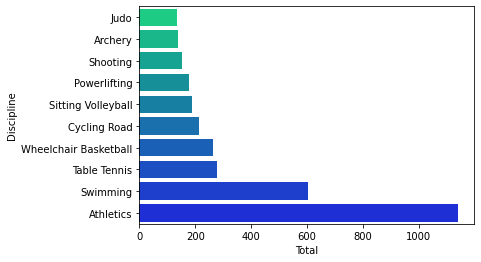

In [25]:
sns.barplot(y='Discipline', x = 'Total', data = both_genders.sort_values(['Total']), palette = 'winter_r')

* The above code gives an output of barplot showing the percentage of teams of both genders participated in top 10 sports in           paralympics.

**Observations:**
* We observed the performance analysis of male, female and both the genders with respect to each sport that had taken place in 2021     Paralympics.

**Analysis of medals by country in Tokyo 2021**

In [ ]:
Medals.head()

* The above code gives an output showing the information present in top 5 rows of Medals dataset. 

In [ ]:
Medals = Medals.drop(['Rank', 'Rank-by-Total', 'Country-Code'], axis = 1)
Medals.head()

* The above code gives an output showing the information present in top 5 rows of Medals dataset, but it does not show the             information present in columns of Rank, Rank-by-total, Country code because we deleted them using drop function.  

In [ ]:
Medals.shape

* The above code gives an output showing number of rows, number of columns present in Medals dataset.

In [ ]:
Med_Go = Medals.sort_values(['Gold'], ascending = False).drop(['Silver', 'Bronze', 'Total'], axis = 1).head(10)
Med_Go

* The above code gives an output showing the top 10 countries which achieved the most gold medals in paralympics.

In [ ]:
sns.barplot(y = 'Country', x = 'Gold', data = Med_Go.sort_values(['Gold']),palette = 'plasma_r')

* The above code gives an output of barplot(graphical visualisation showing the top 10 countries which achieved the most gold medals   in paralympics.

In [ ]:
Medals.sort_values(['Gold'], ascending = False).drop(['Silver', 'Bronze', 'Total'], axis = 1).tail(20)

* The above code gives an output showing 20 countries which achieved the least gold medals in paralympics.

In [ ]:
Med_sil = Medals.sort_values(['Silver'], ascending = False).drop(['Gold', 'Bronze', 'Total'], axis = 1).head(10)
Med_sil

* The above code gives an output showing the top 10 countries which achieved the most silver medals in paralympics.

In [ ]:
sns.barplot(y = 'Country', x = 'Silver', data = Med_sil.sort_values(['Silver']), palette = 'Spectral_r')

* The above code gives an output of barplot showing the top 10 countries which achieved the most silver medals in paralympics.

In [ ]:
Med_Bro = Medals.sort_values(['Bronze'], ascending = False).drop(['Gold', 'Silver', 'Total'],axis = 1).head(10)
Med_Bro

* The above code gives an output showing the top 10 countries which achieved the most bronze medals in paralympics.

In [ ]:
sns.barplot(y = 'Country', x = 'Bronze', data = Med_Bro.sort_values(['Bronze']),palette = 'bone_r')

* The above code gives an output of barplot showing the top 10 countries which achieved the most bronze medals in paralympics.

In [ ]:
Med_Total = Medals.sort_values(['Total'], ascending = False).drop(['Gold', 'Silver', 'Bronze'], axis = 1).head(10)
Med_Total

* The above code gives an output showing the top 10 countries which achieved the most medals in paralympics.

In [ ]:
sns.barplot(y = 'Country', x = 'Total', data = Med_Total.sort_values(['Total']), palette = 'autumn_r')

* The above code gives an output of barplot showing the top 10 countries which achieved the most medals in paralympics.

In [ ]:
Medals2.head()

* The above code gives an output showing the information present in top 5 rows of Medals2 dataset. 

In [ ]:
Medals2 = Medals2.drop(['CountryCode', 'Sport-short', 'Event'], axis = 1)
Medals2.head()

* The above code gives an output showing the information present in top 5 rows of Medals2 dataset, but it does not show the information   present in columns of Event, CountryCode and Sport-short because we deleted them using drop function.  

In [ ]:
Medals2['Country'].unique()

* The unique function is used to get unique values of a series object, so the output will be the unique objects or countries that are   participated in Paralympics.

In [ ]:
Medals2['Sport'].unique()

* The unique function is used to get unique values of a series object, so the output will be the unique objects or sports that are     conducted in Paralympics.

**Let us know about the results of Archery in 2021 Paralympics.**

In [ ]:
Arch_gold = Medals2[(Medals2['Sport'] == 'Archery') & (Medals2['Medal'] == 'Gold Medal')]
Arch_gold

* The above code gives an output showing the countries and the teams that are participated and achieved gold medals in Archery.

In [ ]:
Arch_gold.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most gold medals in Archery.

In [ ]:
arch_sil = Medals2[(Medals2['Sport'] == 'Archery') & (Medals2['Medal'] == 'Silver Medal')]
arch_sil

* The above code gives an output showing the information of countries and teams that are participated and achieved Silver medals in     Archery.

In [ ]:
arch_sil.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize=(8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most Silver medals in Archery.

In [ ]:
arch_bronz = Medals2[(Medals2['Sport'] == 'Archery') & (Medals2['Medal'] == 'Bronze Medal')]
arch_bronz

* The above code gives an output showing the countries and teams which participated and achieved bronze medals in Archery.

In [ ]:
arch_bronz.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most bronze medals in Archery.

**Let us know about the results of Athletics in 2021 Paralympics.**

In [8]:
Athle_gold = Medals2[(Medals2['Sport'] == 'Athletics') & (Medals2['Medal'] == 'Gold Medal')]
Athle_gold.groupby('Country')['Name'].count().sort_values(ascending = False)

Country
People's Republic of China    27
United States of America      13
RPC                           12
Great Britain                  9
Brazil                         8
Switzerland                    7
Ukraine                        6
Islamic Republic of Iran       5
Uzbekistan                     5
Poland                         5
Spain                          4
Germany                        4
Morocco                        4
Australia                      4
Cuba                           4
Thailand                       4
Tunisia                        4
Azerbaijan                     4
South Africa                   3
New Zealand                    3
Netherlands                    3
Algeria                        3
Japan                          3
Venezuela                      3
Mexico                         2
Canada                         2
Finland                        1
Belgium                        1
Chile                          1
Colombia                       1
Co

* The above code gives an output showing the countries which achieved gold medals in Athletics.

In [ ]:
Athle_gold.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Reds_r', shadow = True, figsize = (8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most gold medals in Athletics.

In [ ]:
Athle_silv = Medals2[(Medals2['Sport'] == 'Athletics') & (Medals2['Medal'] == 'Silver Medal')]
Athle_silv.groupby('Country')['Name'].count().sort_values(ascending = False)

* The above code gives an output showing the countries which achieved silver medals in Athletics.

In [ ]:
Athle_silv.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Reds_r', shadow = True, figsize = (8, 6))

* The above code gives an output of piechart showing the countries which achieved the most silver medals in Athletics.

**Let us know about the results of India in 2021 Paralympics.**

In [10]:
gold = Medals2[(Medals2['Country'] == 'India') & (Medals2['Medal'] == 'Gold Medal')]
gold.groupby('Sport')['Name'].count().sort_values(ascending  = False)

Sport
Badminton    2
Shooting     2
Athletics    1
Name: Name, dtype: int64

* The above gives an output showing the Sports in which India achieved gold medals in paralympics.

In [ ]:
gold.groupby('Sport')['Name'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above gives an output of pie chart showing the Sports in which India achieved gold medals in paralympics.

In [ ]:
silv = Medals2[(Medals2['Country'] == 'India') & (Medals2['Medal'] == 'Silver Medal')]
silv.groupby('Sport')['Name'].count().sort_values(ascending  = False)

* The above gives an output showing the Sports in which India achieved Silver medals in paralympics.

In [ ]:
silv.groupby('Sport')['Name'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above gives an output showing the Sports in which India achieved Silver medals in paralympics.

In [ ]:
bronz = Medals2[(Medals2['Country'] == 'India') & (Medals2['Medal'] == 'Bronze Medal')]
bronz.groupby('Sport')['Name'].count().sort_values(ascending  = False)

* The above gives an output showing the Sports in which India achieved Bronze medals in paralympics.

In [ ]:
bronz.groupby('Sport')['Name'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above gives an output of piechart showing the Sports in which India achieved Bronze medals in paralympics.

In [9]:

Medals[['Rank', 'Country', 'Bronze', 'Silver', 'Gold', 'Total']].iloc[:15].style.set_caption('Paralympics Top 15 Countries')\
.bar(subset = ['Gold'], color = '#f0c05a')\
.bar(subset = ['Silver'], color = 'Lightgray')\
.bar(subset = ['Bronze'], color = '#a97142')\


,Rank,Country,Bronze,Silver,Gold,Total
0,1,People's Republic of China,51,60,96,207
1,2,Great Britain,45,38,41,124
2,3,United States of America,31,36,37,104
3,4,RPC,49,33,36,118
4,5,Netherlands,17,17,25,59
5,6,Ukraine,27,47,24,98
6,7,Brazil,30,20,22,72
7,8,Australia,30,29,21,80
8,9,Italy,26,29,14,69
9,10,Azerbaijan,4,1,14,19


* The above code gives an output showing performance analysis of top 14 countries in 2021 Paralympics.

In [ ]:
India = Medals.loc[Medals['Country'] == 'India']
India

* The above code gives an output showing performance analysis of India in paralympics.

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'Gold', y = 'Country', color = '#828A95', data = Medals[:20], palette = 'Blues_d')
plt.title('Gold Medals distribution country wise')
plt.show()

* The above code gives an output showing barplots which represents the distribution of Gold medals between top 20 countries in       paralympics.

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'Silver', y = 'Country', color = '#828A95', data = Medals[:20], palette = 'Blues_d')
plt.title('Silver Medals distribution country wise')
plt.show()

* The above code gives an output showing barplots which represents the distribution of Silver medals between top 20 countries in       paralympics.

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'Bronze', y = 'Country', color = '#828A95', data = Medals[:20], palette = 'Blues_d')
plt.title('Bronze Medals distribution country wise')
plt.show()

* The above code gives an output showing barplots which represents the bronze medal distribution between the top 20 countries in       paralympics.

In [ ]:
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(Medals.corr(), annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12);

* The above code gives an output showing the correlation of the dataframe in the form of heatmap, which contains values representing   various shades of same colour for each value to be plotted and the darker shades represents the higher values than the lighter       shades.

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
top_20 = Medals[:20]
plt.bar(top_20['Country'].values, top_20['Gold'].values, color = '#C49133', label = 'Gold' ,)
plt.bar(top_20['Country'].values, top_20['Silver'].values, width = 0.5, color  = '#828A95', label ='silver')
plt.bar(top_20['Country'].values, top_20['Bronze'].values, width = 0.25, color = '#914E24', label = 'Bronze')
plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize = 20)
plt.xlabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.xticks(fontsize = 14, rotation  = 45)
plt.tight_layout()
plt.show()

* The above code gives an output of graphical representation of medals won by top 15 countries in paralympics using barplots.

**Observations:**
* We observed that the countries like China, Great Britan, USA had achieved most of the medals in 2021 Paralympics when compared to     other countries.
* We also observed the performance analysis and the results of India in each sport with the help of barplots and piecharts.